In [1]:
import warnings                             
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [4]:
df=pd.read_csv('Titanic_test.csv')

In [5]:
df_1=pd.read_csv('Titanic_train.csv')

In [6]:
df_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df_1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
df_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
c_df = pd.concat([df, df_1], ignore_index=True)
c_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [15]:
survived_R = c_df['Survived'].value_counts(normalize=True)
prob_0 = survived_R[0]  # Probability of 0 (not survived)
prob_1 = survived_R[1]  # Probability of 1 (survived)
c_df['Survived'] = c_df['Survived'].apply(
    lambda x: np.random.choice([0, 1], p=[prob_0, prob_1]) if np.isnan(x) else x)

In [16]:
ppl = c_df.copy()

In [17]:
ppl=ppl.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)

In [18]:
ppl['Age'] = ppl['Age'].fillna(df['Age'].mean())
ppl.head(20)

,Sex,Age,Survived
0,male,34.50000,1.0
1,female,47.00000,0.0
2,male,62.00000,1.0
3,male,27.00000,0.0
4,female,22.00000,0.0
5,male,14.00000,0.0
6,female,30.00000,0.0
7,male,26.00000,1.0
8,female,18.00000,0.0
9,male,21.00000,1.0


In [19]:
ppl.isnull().sum()

Sex         0
Age         0
Survived    0
dtype: int64

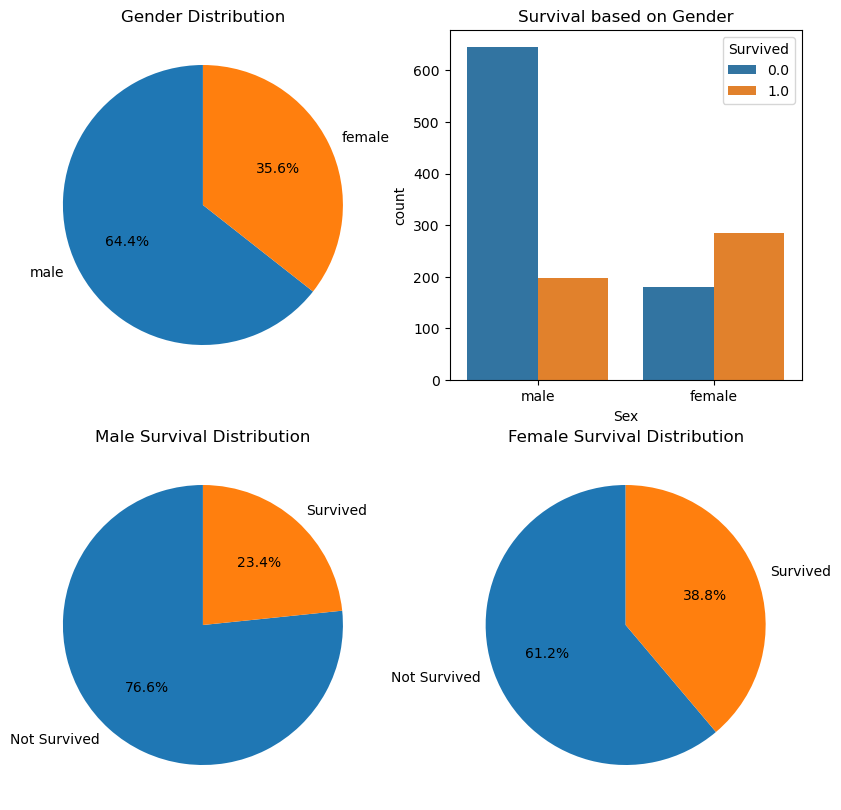

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.pie(ppl['Sex'].value_counts(), labels=ppl['Sex'].value_counts().index, autopct='%1.1f%%' ,startangle=90)
plt.title('Gender Distribution')

plt.subplot(2,2,2)
sns.countplot(x='Sex',hue='Survived',data=ppl)
plt.xlabel('Sex')
plt.ylabel('count')
plt.title('Survival based on Gender')

plt.subplot(2, 2, 3)
male_survival =ppl[ppl['Sex'] == 'male']['Survived'].value_counts()
plt.pie(male_survival ,labels=['Not Survived','Survived'],autopct='%1.1f%%',startangle=90)
plt.title('Male Survival Distribution')

plt.subplot(2, 2, 4)
female_survival = ppl[ppl['Sex'] == 'female']['Survived'].value_counts()
plt.pie(female_survival, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Female Survival Distribution')

plt.show()

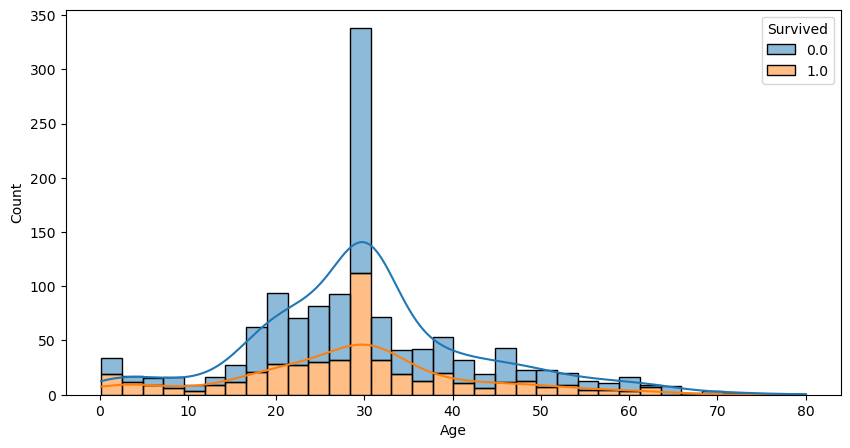

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(data=ppl,x='Age',hue='Survived',multiple='stack',kde='True')
plt.show()

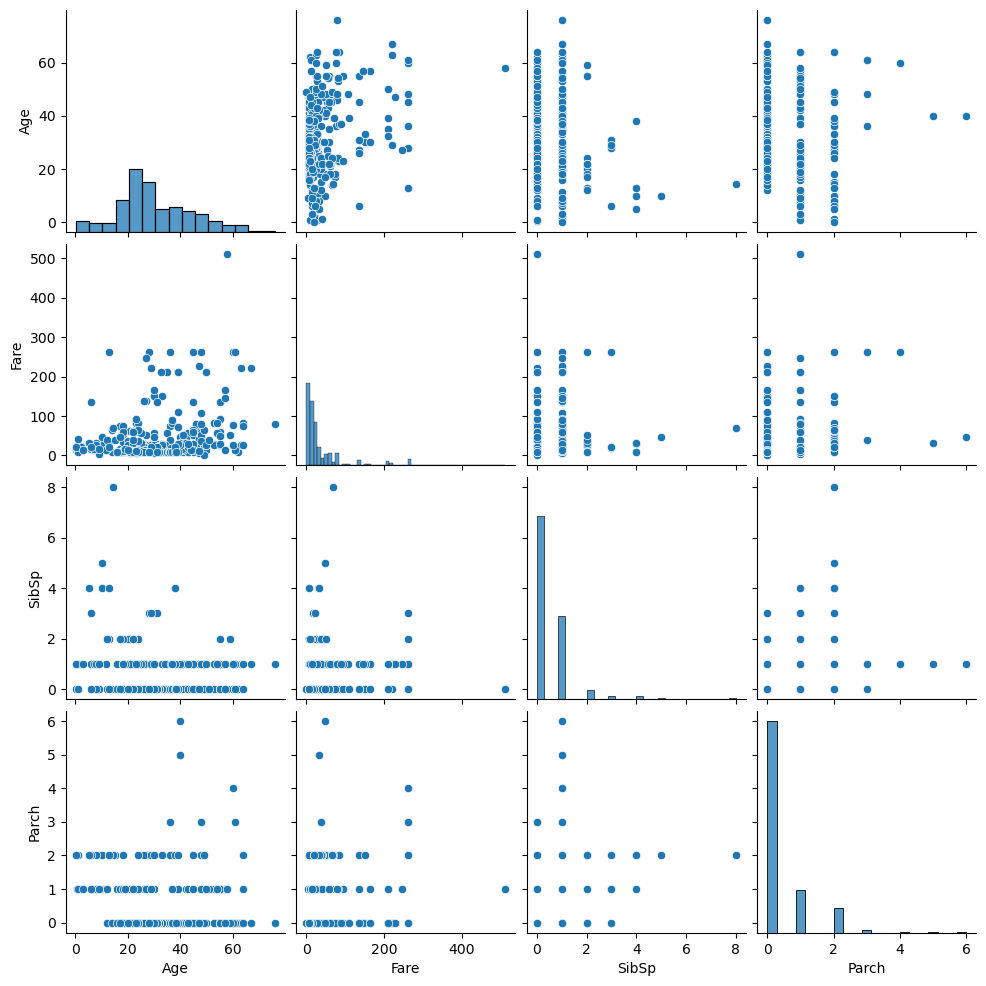

In [22]:
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch']].dropna())
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

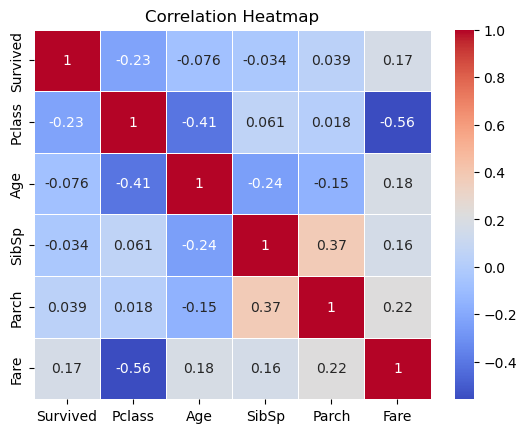

In [23]:
correlation_matrix = c_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

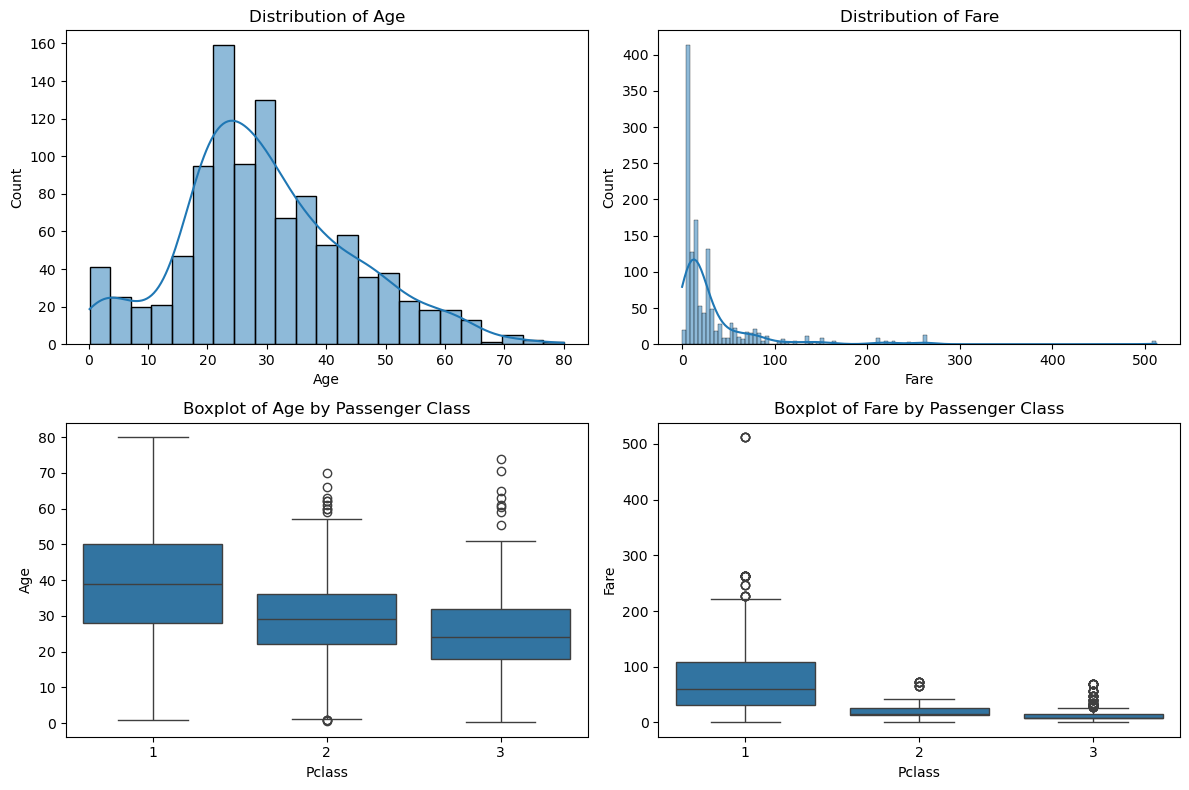

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(c_df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(c_df['Fare'].dropna(), kde=True)
plt.title('Distribution of Fare')

plt.subplot(2, 2, 3)
sns.boxplot(x='Pclass', y='Age', data=c_df)
plt.title('Boxplot of Age by Passenger Class')

plt.subplot(2, 2, 4)
sns.boxplot(x='Pclass', y='Fare', data=c_df)
plt.title('Boxplot of Fare by Passenger Class')

plt.tight_layout()


- 37.3% of women survived, while only 24.1% of men survived
- Children under 10 had a higher survival rate than adults aged 20-40
- 75.9% of males did not survive, while only 24.1% survived
- 62.7% of females did not survive, but 37.3% did
- Higher fare passengers had slightly better chances of survival
- No clear survival pattern based on family size (siblings/parents on board)

In [26]:
c_df=c_df.drop(columns=['Cabin'],errors='ignore')
c_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
Survived         0
dtype: int64

In [27]:
c_df['Age'].fillna(c_df['Age'].median(),inplace = True)
c_df['Embarked'].fillna(c_df['Embarked'].mode()[0], inplace=True)
c_df['Fare'].fillna(c_df['Fare'].mean(),inplace = True)
c_df = pd.get_dummies(c_df, columns=['Sex'])
c_df

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,1.0,False,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,0.0,True,False
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,1.0,False,True
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,0.0,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,0.0,False,True
1305,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,1.0,True,False
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,S,0.0,True,False
1307,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C,1.0,False,True


In [28]:
x=c_df[['PassengerId','Pclass','Sex_female','Sex_male','Age','SibSp','Parch','Fare']]
y=c_df['Survived']

In [29]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model =LogisticRegression()

In [39]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)[:,1]

In [47]:
acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [55]:
print(f'Accuracy: {acc * 100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1*100:.2f}%')
print(f'ROC AUC Score: {roc_auc*100:.2f}%')

Accuracy: 74.05%
Precision: 75.00%
Recall: 0.57
F1 Score: 64.95%
ROC AUC Score: 76.32%


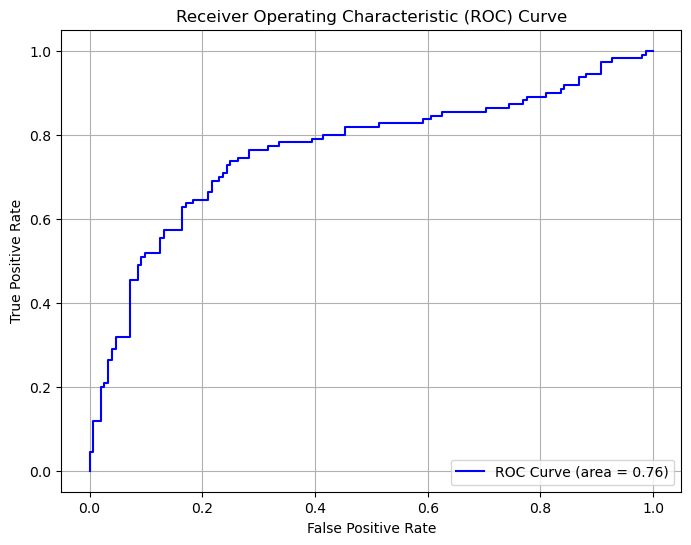

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [63]:
coefficients = model.coef_[0]
features = x.columns

# Creating a DataFrame for better visualization
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print(coeff_df)

       Feature  Coefficient
0  PassengerId    -0.000240
1       Pclass    -0.471799
2   Sex_female     1.263499
3     Sex_male    -0.377083
4          Age    -0.018204
5        SibSp    -0.166673
6        Parch    -0.107320
7         Fare     0.002385


- Females (1.2635) have significantly higher survival odds than males (-0.3771)
- Being in a lower class (-0.4718) reduces survival chances
- Each additional year (-0.0182) slightly decreases survival odds
- More siblings/spouses (-0.1667) aboard negatively affects survival
- Higher fare (0.0024) increases survival odds slightly

In [66]:
import joblib

# Save the trained model
joblib.dump(model, 'titanic_logistic_regression_model.pkl')

['titanic_logistic_regression_model.pkl']

In [68]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [69]:
import streamlit as st

In [72]:
model = joblib.load('titanic_logistic_regression_model.pkl')

# Function to make predictions
def predict_survival(pclass, sex, age, sibsp, parch, fare):
    input_data = pd.DataFrame({
        'Pclass': [pclass],
        'Sex': [1 if sex == 'male' else 0],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare]
    })
    prediction = model.predict(input_data)
    return prediction[0]

# Streamlit app layout
st.title('Titanic Survival Prediction')
st.write('Enter passenger details to predict survival probability.')

# User inputs
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.number_input('Age', min_value=0.0, max_value=100.0, value=30.0)
sibsp = st.number_input('Number of Siblings/Spouses aboard', min_value=0, max_value=10, value=0)
parch = st.number_input('Number of Parents/Children aboard', min_value=0, max_value=10, value=0)
fare = st.number_input('Fare', min_value=0.0, value=50.0)

# Prediction button
if st.button('Predict'):
    result = predict_survival(pclass, sex, age, sibsp, parch, fare)
    if result == 1:
        st.success('The passenger is predicted to survive!')
    else:
        st.error('The passenger is predicted not to survive.')

2024-10-12 23:00:32.715 
  command:

    streamlit run C:\Users\AUSUS\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [78]:
 streamlit run ipykernel_launcher.py

SyntaxError: invalid syntax (845579729.py, line 1)